<a href="https://colab.research.google.com/github/ImRafex/RAA/blob/main/Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lineer Regresyon**


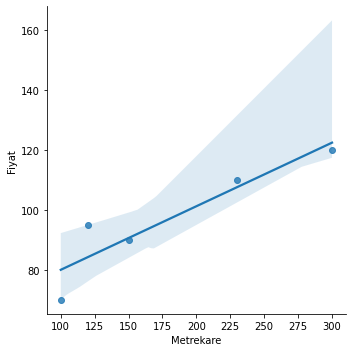

In [1]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data = {
    'Metrekare':[100, 150, 120, 300, 230], 
    'Fiyat':[70, 90, 95, 120, 110]
    })

sns.lmplot(x='Metrekare', y='Fiyat', data = df)


**y = wx + b**
*   y = label (Fiyat)
*   w = Weight of x
*   x = Feature (Metrekare)
*   b = bias





In [2]:
from  sklearn.linear_model import LinearRegression
import numpy as np

df = pd.DataFrame(data = {
    'Metrekare': [100, 150, 120, 300, 230], 
    'Fiyat': [70, 90, 95, 120, 110]
    })

X = df.iloc[:,:-1].values   # feature
y = df.iloc[:,-1].values    # label

reg = LinearRegression().fit(X,y)

print(f"Score: {reg.score(X,y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.8460528874197938
Coefficient: [0.21223022]
Intercept: 58.79856115107912


In [3]:
metrekare = int(input("Lütfen fiyat tahminini yapacağınız metrekareyi giriniz: "))

print(f"{metrekare} metrekare evin tahmini fiyatı: {reg.predict(np.array([[metrekare]]))}")

Lütfen fiyat tahminini yapacağınız metrekareyi giriniz: 170
170 metrekare evin tahmini fiyatı: [94.87769784]


In [4]:
metrekare * reg.coef_[0] + float(reg.intercept_)

94.87769784172662

# **Multiple Lineer Regresyon**

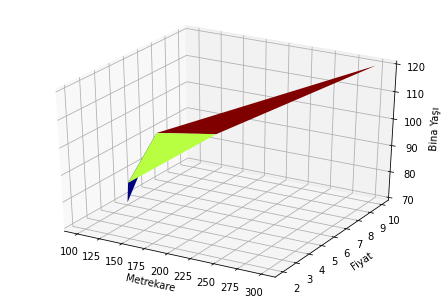

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame(data = {
    'Metrekare':[100, 150, 120, 300, 230], 
    'Bina Yaşı':[5, 2, 6, 10, 3], 
    'Fiyat':[70, 90, 95, 120, 110]
    })

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df['Metrekare'], df['Bina Yaşı'], df['Fiyat'], cmap=cm.jet, linewidth=0.2)
ax.set_xlabel('Metrekare')
ax.set_ylabel('Fiyat')
ax.set_zlabel('Bina Yaşı')
plt.show()

**y = w1x1 + w2x2 + c**

*   y = label (Fiyat)
*   w1 = Weight of x1
*   x1 = Feature 1 (Metrekare)
*   w2 = Weight of x2
*   x2 = Feature 2 (Bina Yaşı)
*   c = bias





In [6]:
df = pd.DataFrame(data = {
    'Metrekare':[100, 150, 120, 300, 230], 
    'Bina Yaşı':[5, 2, 6, 10, 3], 
    'Fiyat':[70, 90, 95, 120, 110]
    })

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

reg = LinearRegression().fit(X, y)

print(f"Score: {reg.score(X, y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.8465258951131542
Coefficient: [ 0.21520796 -0.15619124]
Intercept: 59.0747612003911


# Non-Lineer - Polynomial **Regresyon**

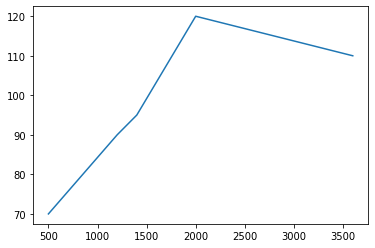

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data = {
    'Metrekare':[100, 150, 160, 200, 230], 
    'Yükseklik':[50, 60, 70, 80, 90], 
    'Genişlik': [10, 20, 20, 25, 40], 
    'Fiyat':[70, 90, 95, 120, 110]
    })

df['Alan'] = df['Yükseklik'] * df['Genişlik']
df.drop(columns = ['Yükseklik', 'Genişlik'])

plt.plot(df['Alan'], df['Fiyat'])

y = ax ** 3 + b

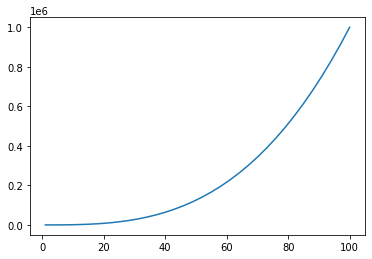

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data = {
    'Metrekare': range(1,101, 3)
    })

df['Fiyat'] = df['Metrekare'] ** 3

plt.plot(df['Metrekare'], df['Fiyat'])

# **Regresyon Modelimizde Hata Kavramı**

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(data = {
    'Metrekare':[100, 150, 120, 300, 230], 
    'Fiyat':[70, 90, 95, 120, 110]
    })

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

reg = LinearRegression().fit(X, y)

toplam_hata = 0
for idx in range(len(df)):
  gercek_fiyat = df.loc[idx]['Fiyat']
  metrekare = df.loc[idx]['Metrekare']

  tahmin_fiyat = reg.predict([[metrekare]])[0]

  # Hatali gosterim abs eklenmeli, olmamasi gerekiyor!
  print(f"{df.loc[idx]['Metrekare']} metrekare için gerçek fiyat: {gercek_fiyat}. Tahmin edilen fiyat: {tahmin_fiyat}. HATA: {gercek_fiyat - tahmin_fiyat}")
  toplam_hata = gercek_fiyat - tahmin_fiyat

print(f"\nToplam Hata: {toplam_hata}")

100 metrekare için gerçek fiyat: 70. Tahmin edilen fiyat: 80.02158273381295. HATA: -10.021582733812949
150 metrekare için gerçek fiyat: 90. Tahmin edilen fiyat: 90.63309352517986. HATA: -0.6330935251798593
120 metrekare için gerçek fiyat: 95. Tahmin edilen fiyat: 84.2661870503597. HATA: 10.733812949640296
300 metrekare için gerçek fiyat: 120. Tahmin edilen fiyat: 122.46762589928059. HATA: -2.4676258992805913
230 metrekare için gerçek fiyat: 110. Tahmin edilen fiyat: 107.61151079136691. HATA: 2.3884892086330893

Toplam Hata: 2.3884892086330893


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

In [10]:
df.head()

,Metrekare,Fiyat
0,100,70
1,150,90
2,120,95
3,300,120
4,230,110


# **R2 (R squared)**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.DataFrame(data = {
    'Metrekare':[100, 150, 120, 300, 230], 
    'Bina Yaşı':[5, 2, 6, 10, 3], 
    'Fiyat':[70, 90, 95, 120, 110]})

In [12]:
df.head()

,Metrekare,Bina Yaşı,Fiyat
0,100,5,70
1,150,2,90
2,120,6,95
3,300,10,120
4,230,3,110


In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [14]:
X

array([[100,   5],
       [150,   2],
       [120,   6],
       [300,  10],
       [230,   3]])

In [15]:
y

array([ 70,  90,  95, 120, 110])

In [16]:
reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  metrekare = df.loc[idx]["Metrekare"]
  bina_yasi = df.loc[idx]["Bina Yaşı"]

  y_pred.append(reg.predict([[metrekare,bina_yasi]]))

print(reg.score(X, y)) # X -> Test verisi, y -> Test verilerinin gerçek label değerleri
print(r2_score(y, y_pred)) # y -> Gerçek label değerleri, y_pred -> model tarafından tahmin edilen y değerleri

0.8465258951131542
0.8465258951131542


# **Mean Absolute Error (MAE)**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.DataFrame(data = {
    'Metrekare':[100, 150, 120, 300, 230], 
    'Bina Yaşı':[5, 2, 6, 10, 3], 
    'Fiyat':[70, 90, 95, 120, 110]
    })

X = df.iloc[:,:-1].values # feature values (take columns until last column)
y = df.iloc[:,-1].values # label values (take only last column)

reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  metrekare = df.loc[idx]["Metrekare"]
  bina_yasi = df.loc[idx]["Bina Yaşı"]

  y_pred.append(reg.predict([[metrekare,bina_yasi]]))


print(mean_absolute_error(y, y_pred))

5.173364755434096


# **Mean Squared Error (MSE)**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(data = {
    'Metrekare':[100, 150, 120, 300, 230], 
    'Bina Yaşı':[5, 2, 6, 10, 3], 
    'Fiyat':[70, 90, 95, 120, 110]})

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  metrekare = df.loc[idx]["Metrekare"]
  bina_yasi = df.loc[idx]["Bina Yaşı"]

  y_pred.append(reg.predict([[metrekare,bina_yasi]]))


print(mean_squared_error(y, y_pred))

45.42833504650633


# **Verimizi Eğitim - Test - Validasyon Setlerine Ayırmak (train-test-validation split)**

In [19]:
#train-test split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230, 175, 220, 270, 190, 220], 
                          'Bina Yaşı':[5, 2, 6, 10, 3, 7, 6, 8, 9, 4], 
                          'Fiyat':[70, 90, 95, 120, 110, 120, 95, 140, 220, 100]})

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_train)

(8, 2)
(2, 2)
(8,)
(2,)
[[100   5]
 [120   6]
 [150   2]
 [220   4]
 [270   8]
 [300  10]
 [220   6]
 [230   3]]


In [20]:
X_train

array([[100,   5],
       [120,   6],
       [150,   2],
       [220,   4],
       [270,   8],
       [300,  10],
       [220,   6],
       [230,   3]])

In [21]:
X_test

array([[190,   9],
       [175,   7]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

print(X_train)

[[100   5]
 [120   6]
 [150   2]
 [220   4]
 [270   8]
 [300  10]
 [220   6]
 [230   3]]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

print(X_train)

[[270   8]
 [120   6]
 [150   2]
 [220   4]
 [300  10]
 [100   5]
 [220   6]
 [175   7]]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

print(X_train)

[[100   5]
 [120   6]
 [150   2]
 [220   4]
 [270   8]
 [300  10]
 [220   6]
 [230   3]]


In [25]:
#train-test-validation split
df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230, 175, 220, 270, 190, 220], 
                          'Bina Yaşı':[5, 2, 6, 10, 3, 7, 6, 8, 9, 4], 
                          'Fiyat':[70, 90, 95, 120, 110, 120, 95, 140, 220, 100]})

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_validasyon, y_train, y_validasyon = train_test_split(X_train, y_train, test_size=2)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

print(X_validasyon.shape)
print(y_validasyon.shape)

print(X_train)

(6, 2)
(2, 2)
(6,)
(2,)
(2, 2)
(2,)
[[230   3]
 [220   4]
 [120   6]
 [150   2]
 [270   8]
 [300  10]]


# **L1 (Lasso) Regülarizasyon**

In [26]:
from sklearn.linear_model import Lasso

df = pd.DataFrame(data = {
    'Metrekare':[100, 150, 120, 300, 230], 
    'Bina Yaşı':[5, 2, 6, 10, 3], 
    'Fiyat':[70, 90, 95, 120, 110]})

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

model = Lasso(alpha=0.1)
model.fit(X, y)

print(model.coef_)
print(model.score(X, y))
print(model.intercept_)

print(model.predict([[300, 9]]))

[ 0.21485124 -0.1384319 ]
0.8465197737595426
59.04662250437324
[122.2561077]


https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization

# **L2 (Ridge) Regülarizasyon**

In [27]:
from sklearn.linear_model import Ridge

df = pd.DataFrame(data = {
    'Metrekare':[100, 150, 120, 300, 230], 
    'Bina Yaşı':[5, 2, 6, 10, 3], 
    'Fiyat':[70, 90, 95, 120, 110]
    })

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

model = Ridge(alpha=0.1)
model.fit(X, y)

print(model.coef_)
print(model.score(X, y))
print(model.intercept_)

model.predict([[300, 9]])

[ 0.21519658 -0.15563458]
0.8465258890938407
59.07391617007209


array([122.23217769])